The dataset has known groups- cancer and control.  We want the data to be patterened into these groups.  Therefore, the classification method of machine learning is most appropriate. 

In [37]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

df= pd.read_csv('breast.csv')

In [38]:
X1 = df.drop('Classification', axis=1)
X2 = X1.drop('Age', axis=1)
X3 = X2.drop('BMI', axis=1)
X4 = X3.drop('Leptin', axis=1)
X5 = X4.drop('Adiponectin', axis=1)
X6 = X5.drop('MCP.1', axis=1)

The confusion matrix for K Neighbors Classifier is listed below:
[[13  2]
 [ 5  9]]
The ROC score for the K Neighbors Classifier is 0.75 


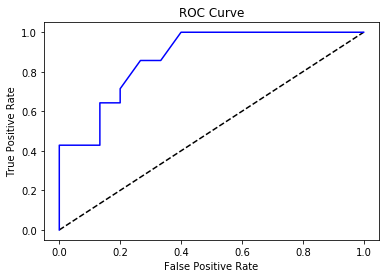

In [55]:
y = df['Classification'].values
X = X6.values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
y=y.ravel()

neighbors = list(range(1, 50, 2))

cv_scores = []

for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())

knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

y_pred_prob = knn.predict_proba(X_test)[:,1]

tpr, fpr, thresholds = roc_curve(y_test, y_pred_prob, pos_label=1)

print('The confusion matrix for K Neighbors Classifier is listed below:')
print(metrics.confusion_matrix(y_test, y_pred))
print( 'The ROC score for the K Neighbors Classifier is {0:.2f} '.format(roc_auc_score(y_test, y_pred)))


plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, 'b')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')

plt.show()